1. Import required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

2. Load the Data

In [ ]:
df = pd.read_csv('/content/mldata.csv')
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [ ]:
unique_labels = df['Suggested Job Role'].unique()
print("Unique class labels:", unique_labels)

Unique class labels: ['Applications Developer' 'CRM Technical Developer' 'Database Developer'
 'Mobile Applications Developer' 'Network Security Engineer'
 'Software Developer' 'Software Engineer'
 'Software Quality Assurance (QA) / Testing'
 'Systems Security Administrator' 'Technical Support' 'UX Designer'
 'Web Developer']


In [ ]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 6901 professionals and 20 features


3. Data Preprocessing

In [ ]:

print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [ ]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


(1) Checking Missing Values

In [ ]:

df.isnull().sum(axis=0)

,0
Logical quotient rating,0
hackathons,0
coding skills rating,0
public speaking points,0
self-learning capability?,0
Extra-courses did,0
certifications,0
workshops,0
reading and writing skills,0
memory capability score,0


(2) Checking Distinct Values for Categorical Features

In [ ]:
categorical_col = df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score',
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
                      'Introvert', 'interested career area ']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

self-learning capability?
yes    3496
no     3405
Name: count, dtype: int64

Extra-courses did
no     3529
yes    3372
Name: count, dtype: int64

reading and writing skills
excellent    2328
medium       2315
poor         2258
Name: count, dtype: int64

memory capability score
medium       2317
excellent    2303
poor         2281
Name: count, dtype: int64

Taken inputs from seniors or elders
yes    3501
no     3400
Name: count, dtype: int64

Management or Technical
Management    3461
Technical     3440
Name: count, dtype: int64

hard/smart worker
smart worker    3523
hard worker     3378
Name: count, dtype: int64

worked in teams ever?
no     3470
yes    3431
Name: count, dtype: int64

Introvert
yes    3544
no     3357
Name: count, dtype: int64

interested career area 
system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: count, dtype: in

(3) Checking Data Balancing for Classification

<Axes: xlabel='Suggested Job Role', ylabel='count'>

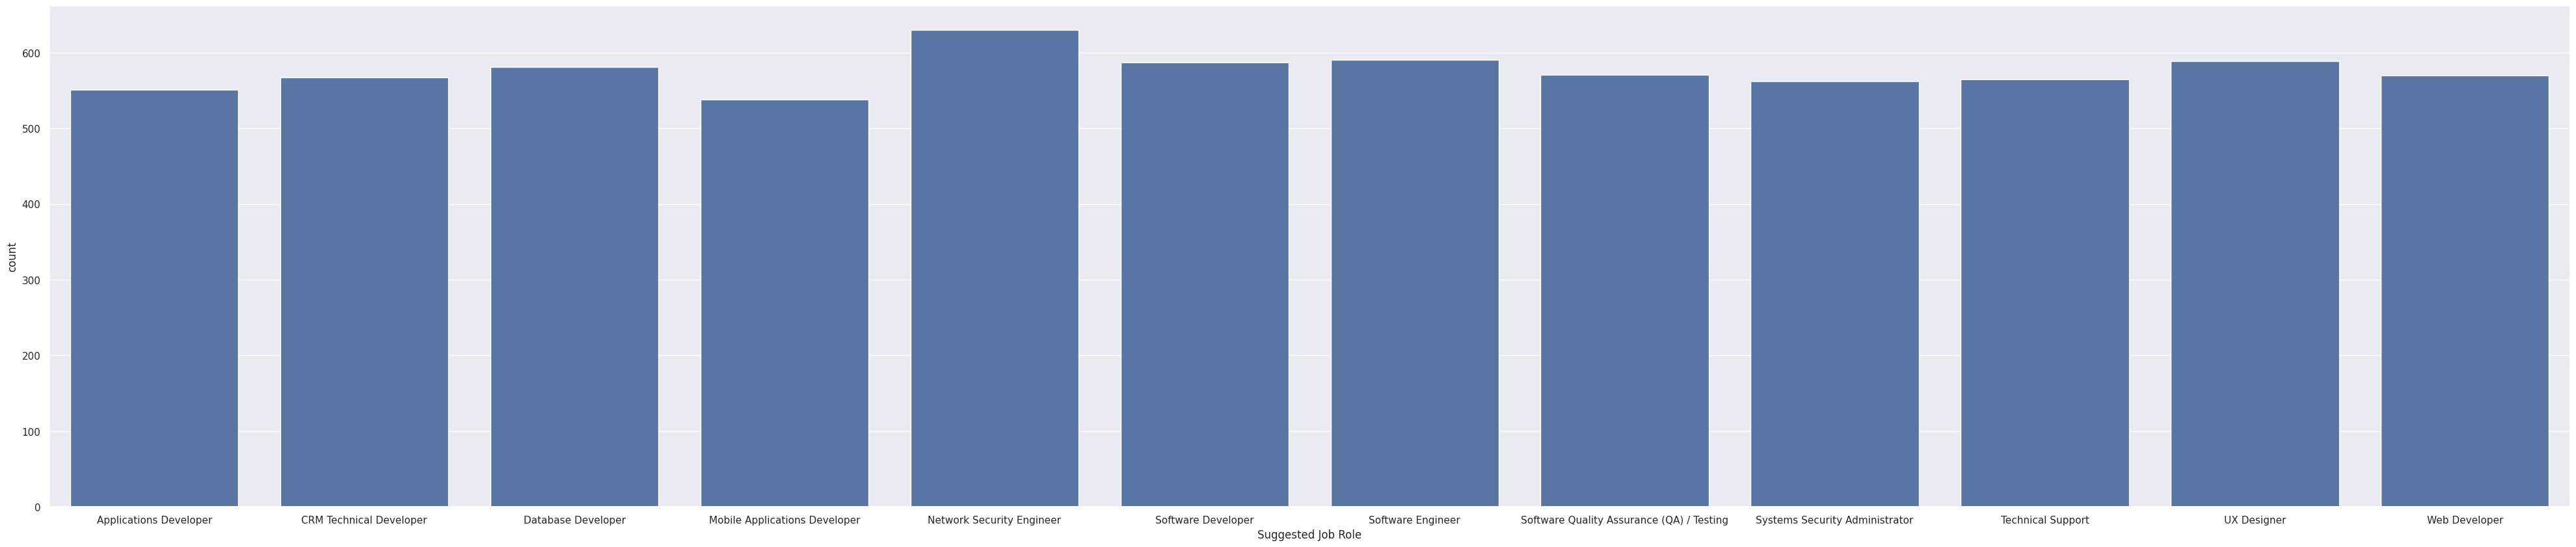

In [ ]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

4. Exploratory Data Analysis

(1) Correlation Between Numerical Features

<Axes: >

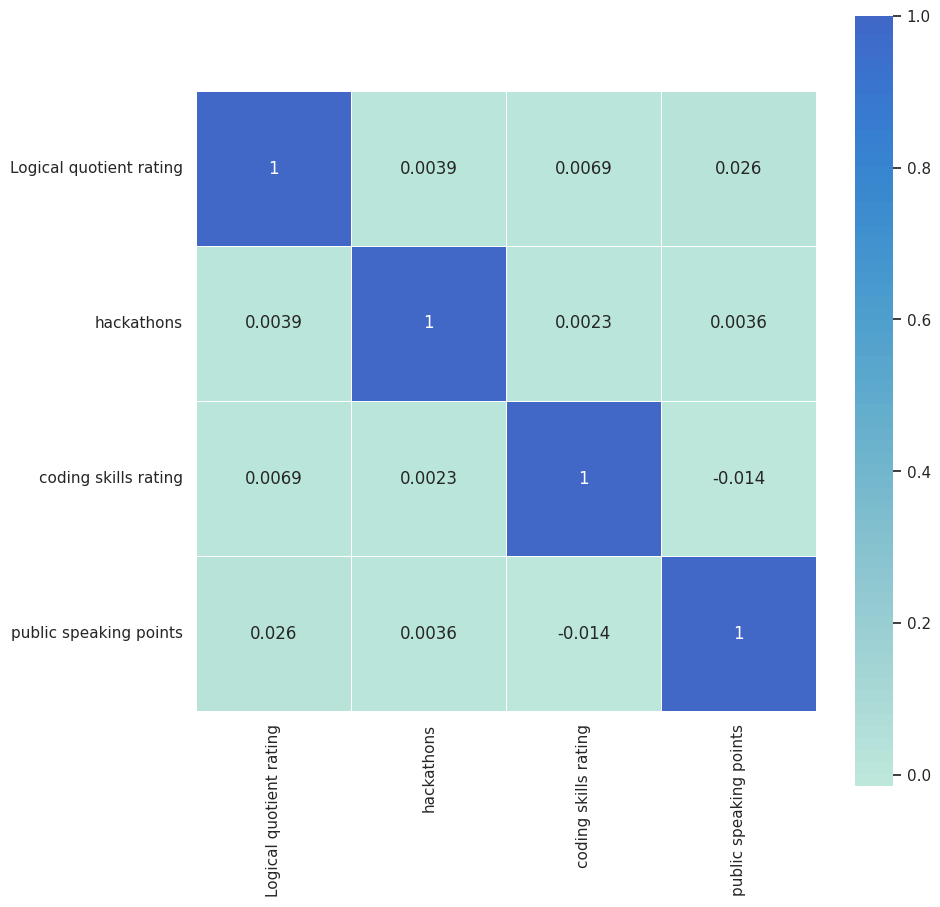

In [ ]:
corr = df[['Logical quotient rating', 'hackathons',
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

(b) Visualization for Categorical Variables

In [ ]:
print(df["Interested subjects"].value_counts())

Interested subjects
Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: count, dtype: int64


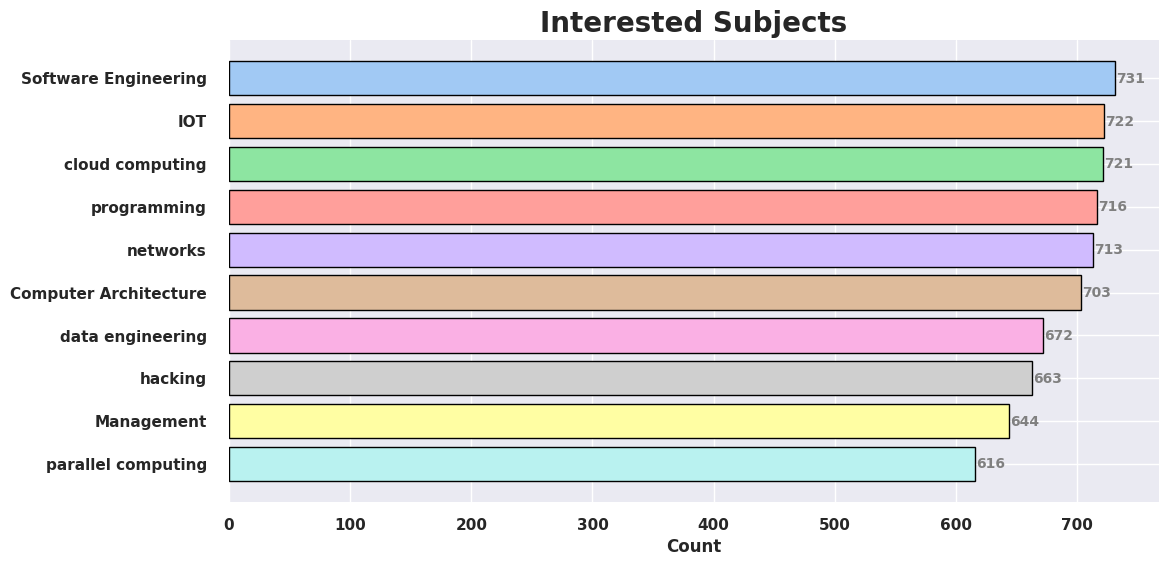

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [ ]:
print(df["Interested Type of Books"].value_counts())

Interested Type of Books
Guide                    405
Health                   401
Self help                377
Horror                   377
Biographies              219
Science fiction          218
Satire                   212
Childrens                212
Autobiographies          210
Prayer books             207
Fantasy                  205
Journals                 203
Trilogy                  203
Anthology                202
Encyclopedias            201
Drama                    201
Mystery                  200
History                  199
Science                  198
Dictionaries             198
Diaries                  197
Religion-Spirituality    197
Action and Adventure     193
Poetry                   193
Cookbooks                186
Comics                   186
Art                      186
Travel                   186
Series                   180
Math                     176
Romance                  173
Name: count, dtype: int64


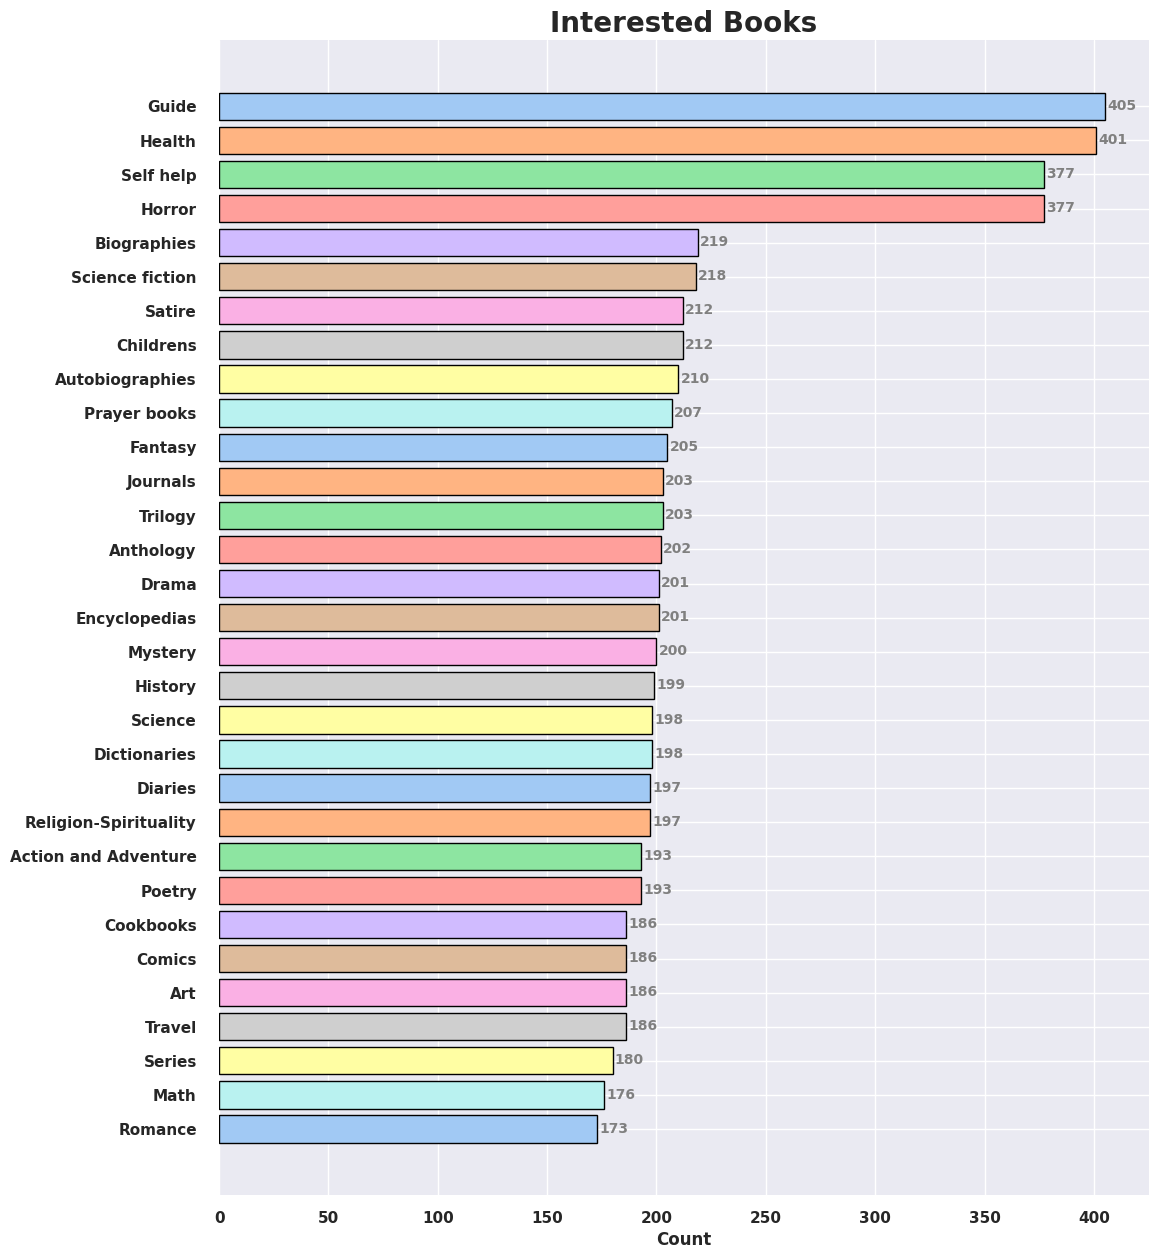

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Interested Type of Books"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [ ]:
print(df["certifications"].value_counts())

certifications
r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: count, dtype: int64


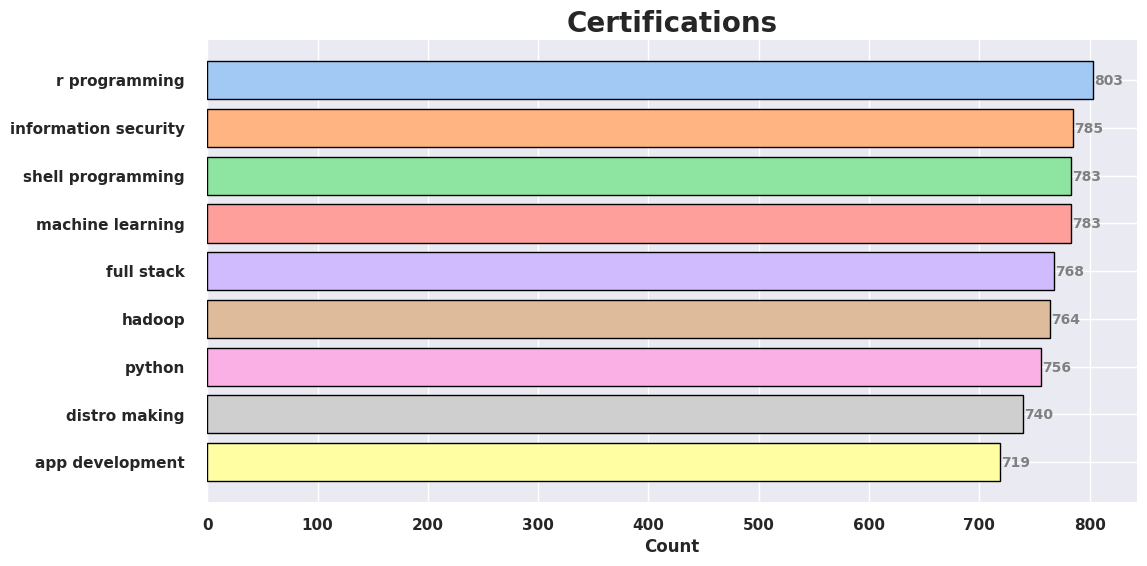

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [ ]:
print(df["workshops"].value_counts())

workshops
database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: count, dtype: int64


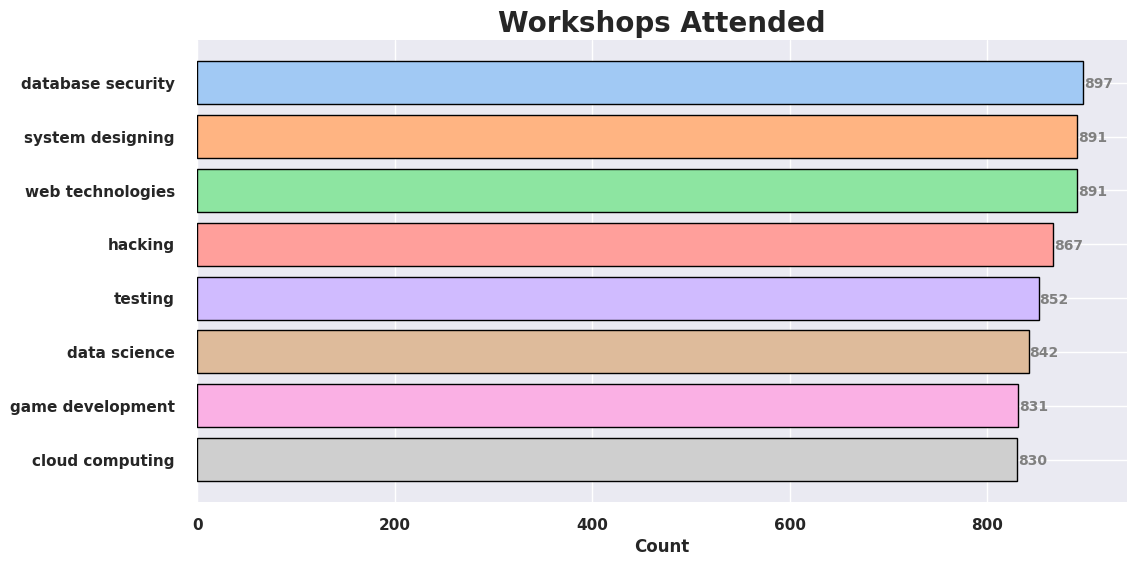

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [ ]:
print(df["Type of company want to settle in?"].value_counts())

Type of company want to settle in?
Service Based                        725
Web Services                         719
BPA                                  711
Testing and Maintainance Services    698
Product based                        695
Finance                              694
Cloud Services                       692
product development                  669
Sales and Marketing                  658
SAaS services                        640
Name: count, dtype: int64


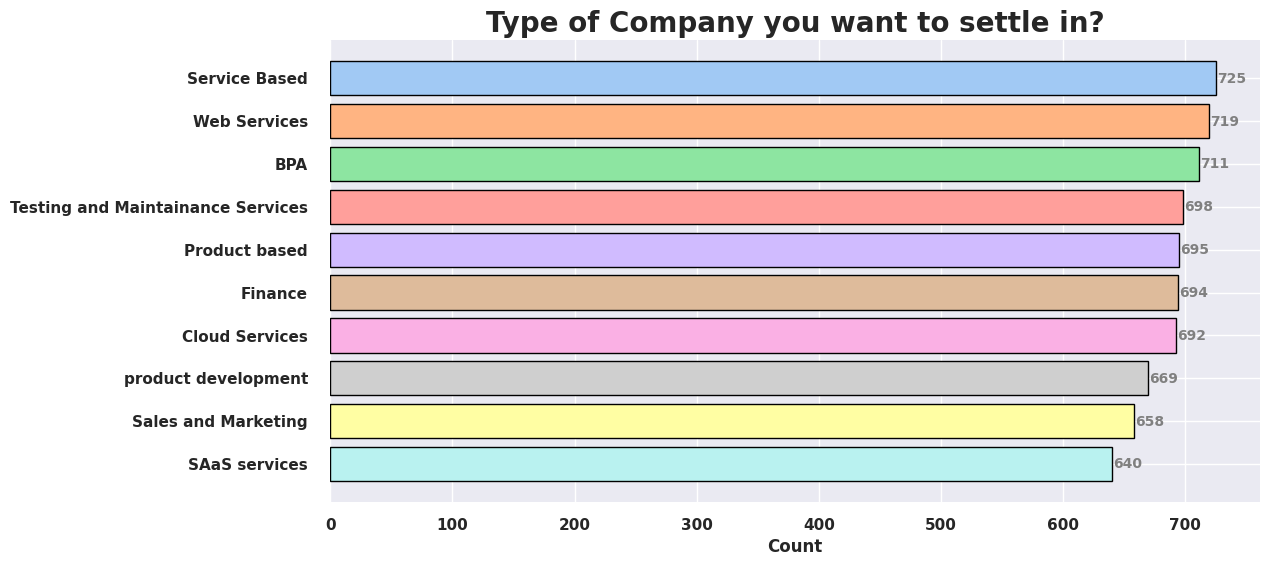

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [ ]:
print(df["interested career area "].value_counts())

interested career area 
system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: count, dtype: int64


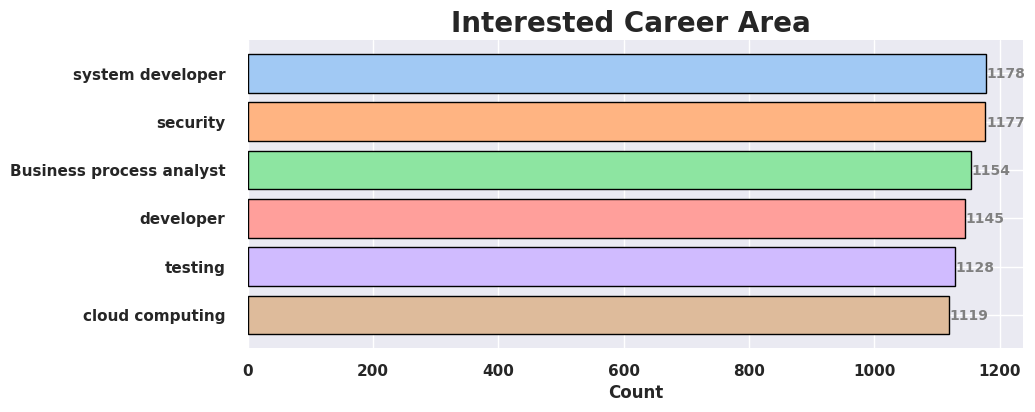

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested career area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

5. Feature Engineering

(1) Binary Encoding for Categorical Variables

In [ ]:
cols = df[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)

<ipython-input-23-97ce09f35dce>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cleanup_nums)


In [ ]:
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


(2) Number Encoding for Categorical

In [ ]:
mycol = df[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

category_cols = df[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?',
                    'Interested Type of Books']]
for i in category_cols:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Management or Technical', 'hard/smart worker', 'Suggested Job Role']


<ipython-input-25-9f22ba9c66f3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cleanup_nums)


(3) Dummy Variable Encoding

In [ ]:
print(df['Management or Technical'].unique())
print(df['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [ ]:
df = pd.get_dummies(df, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,True,False,False,True
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,False,True,True,False
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,False,True,False,True
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,True,False,False,True
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,False,True,True,False


In [ ]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code']


6. Building Machine Learning Model 🤖

In [ ]:
feed = df[['Logical quotient rating', 'coding skills rating', 'hackathons', 'public speaking points', 'self-learning capability?','Extra-courses did',
           'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'reading and writing skills', 'memory capability score',
           'B_hard worker', 'B_smart worker', 'A_Management', 'A_Technical', 'Interested subjects_code', 'Interested Type of Books_code', 'certifications_code',
           'workshops_code', 'Type of company want to settle in?_code',  'interested career area _code',
             'Suggested Job Role']]

# Taking all independent variable columns
df_train_x = feed.drop('Suggested Job Role',axis = 1)

# Target variable column
df_train_y = feed['Suggested Job Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

(1) Decision Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[11  9 10 12 13 19  8  9  8 13 11  9]
 [13  5  6  7  6  6 11  9 13 11  7 11]
 [12 11 11 10 17 10  9  7  8  6 10 12]
 [ 6 12  9  8  9  6  6  7  7  9 11 10]
 [10  8  6 10 17 15  4  9  6  9 18  9]
 [11 12 10 12  9  9  5  8 11 14  8  4]
 [ 7 15 12 10  8  6 13  8  9 11 13  4]
 [ 8  8  7  7  9  9 22 11 11  5 11 10]
 [ 9  9  8 13  8 15 13 10  5  5  8 11]
 [ 7  8  7 10 20  9 10  6  7  8 12  7]
 [ 8 11  6 10 14  9 14 13  8  8 11  7]
 [ 7  7 10 16  8  7 10  6 11  9  8 10]]
  
accuracy= 0.8616944243301955


Predicting class for one instance

In [ ]:
#Predicting class for one instance
userdata = [['7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8',
                    '7','5','7','4','5','6','8','8']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Technical Support']
Probabilities of all classes:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Probability of Predicted class :  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(2) Supprt Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[ 1  5  0  6 41 20 18  6 15 12  6  2]
 [ 1  7  0  3 44  5 15 13  3  9  3  2]
 [ 0  5  2  5 44 14 19  9  6 10  6  3]
 [ 2  7  1  3 41 13  9  6  3 10  2  3]
 [ 2  7  3  4 40 17 18  9  4 13  1  3]
 [ 1 10  0  4 44 14 12 13  4  8  2  1]
 [ 1  6  3  2 40  7 13 17 12  8  4  3]
 [ 0  7  1  6 37 12 16 13 11 11  4  0]
 [ 0  9  0  3 37 13 14 13  6 12  2  5]
 [ 0  8  0  3 43 13 15  8  5 11  3  2]
 [ 1  8  1  3 40 16 18 12  4 10  4  2]
 [ 2  9  6  2 33 13 10 12 10  9  2  1]]
  
accuracy= 0.8327299058653149


In [ ]:
ynewclass = svm.predict(userdata)
ynew = svm.decision_function(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Software Engineer']
Probabilities of all classes:  [[ 0.72317165  8.25769355 -0.2843185   7.17416306  3.83458056  4.87344345
  10.27976749  9.2644453   1.73122697  7.04310678 10.27669569  2.77294512]]
Probability of Predicted class :  10.279767490035844


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


(3)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_y_pred = log_reg.predict(x_test)
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print("Confusion Matrix for Logistic Regression =", log_reg_cm)
print("  ")
print("Accuracy (Logistic Regression) =", log_reg_accuracy * 10)


Confusion Matrix for Logistic Regression = [[ 8  7  6  6 22  8  7 19 21 15  8  5]
 [ 7  9  5  7 24  2  9 18  6 11  5  2]
 [ 3  7  7  4 19 12 15 18 10 16  7  5]
 [ 4  5  6  1 18  4  9 13 11 14  6  9]
 [ 7 12  8  3 21  8 14 11 12 14  5  6]
 [ 1  8  2  3 28  8 12 15  9 13  8  6]
 [ 8  8  5  7 27  7 12 11  7 14  6  4]
 [ 4  7  7  4 24 13 12 14 11 11  5  6]
 [ 4  7  8  3 23 10 10 13 13 10  7  6]
 [ 3  5 15  2 26  9 12 12  6 12  7  2]
 [ 2 10 11  3 22 17  5 11 14 13  5  6]
 [ 3 11  7  4 22 11  7 10 12 10  4  8]]
  
Accuracy (Logistic Regression) = 0.8544532947139754


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
userdata_numeric = np.array(userdata, dtype=float)
ynewclass_log = log_reg.predict(userdata_numeric)
ynew_log = log_reg.predict_proba(userdata_numeric)
print("Predicted class (Logistic Regression):", ynewclass_log)
print("Probabilities of all classes (Logistic Regression): ", ynew_log)
print("Probability of Predicted class (Logistic Regression): ", np.max(ynew_log))

Predicted class (Logistic Regression): ['Web Developer']
Probabilities of all classes (Logistic Regression):  [[0.02194131 0.03990552 0.02218314 0.02054741 0.19894688 0.06552183
  0.04686888 0.07568065 0.19957366 0.00727262 0.06043009 0.24112801]]
Probability of Predicted class (Logistic Regression):  0.24112800670814977


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(4) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Confusion Matrix for KNN =", knn_cm)
print("  ")
print("Accuracy (KNN) =", knn_accuracy * 10)

Confusion Matrix for KNN = [[33 16  7 10 15 10  9  5  4  9  9  5]
 [29 17  7  8 10  7  9  2  2  2  6  6]
 [18 15 18 19 13  2 10  4  7  7  3  7]
 [20 15 18 15  7  3  6  4  2  2  4  4]
 [22 22  8 15  6  7  4  9  8  5  6  9]
 [27 17 11 11  5 10  2  5  7  4  8  6]
 [27 16 12  8 11  7  7  6  1  7  5  9]
 [19 24 14 12  7  6  7  5  5  7  6  6]
 [24 20 14  6  8  4  5  5 10  9  3  6]
 [20 19 14 10  7 10 13  3  4  3  3  5]
 [30 16 16  7 10  6  6  3  9  8  4  4]
 [32 23  8  8  6  3  7  5  6  6  2  3]]
  
Accuracy (KNN) = 0.9485879797248371


In [ ]:
ynewclass_knn = knn.predict(np.array(userdata, dtype=float))
ynew_knn = knn.predict_proba(np.array(userdata, dtype=float))
print("Predicted class (KNN):", ynewclass_knn)
print("Probabilities of all classes (KNN): ", ynew_knn)
print("Probability of Predicted class (KNN): ", np.max(ynew_knn))

Predicted class (KNN): ['Database Developer']
Probabilities of all classes (KNN):  [[0.  0.  0.4 0.  0.  0.  0.2 0.  0.2 0.  0.  0.2]]
Probability of Predicted class (KNN):  0.4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(5) Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*10)

confusion matrics= [[ 9 13 16  3 10 14 13 13 12  9 12  8]
 [ 8 13  9  7 19  8  5  7  4 10  8  7]
 [11 10  6 12 15  9 12 12 11  8  8  9]
 [ 9  8  5 13 25  4  6  6  7  6  4  7]
 [11 13 12  8 17  9  8  4 10  8 12  9]
 [ 6  8 12  6 18  6  4 12  9  7 14 11]
 [ 8  8 10 10 21  6 13  9 11  7  7  6]
 [11  8  9  8 21 11 13  8  8  7  6  8]
 [ 7 12 10  5 16 18 12  8 10  5  5  6]
 [ 6 10 14  6  9 12 12  9  9 10  5  9]
 [10 12 10  9 12  9 20  7  6 11  9  4]
 [10  9 11  8 14 11  9  8  7  7  8  7]]
  
accuracy= 0.8761766835626359


In [ ]:
ynewclass = rf.predict(userdata)
ynew = rf.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Web Developer']
Probabilities of all classes:  [[0.02 0.12 0.09 0.03 0.12 0.07 0.12 0.06 0.07 0.1  0.07 0.13]]
Probability of Predicted class :  0.13


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



(6) XGB

In [ ]:
!pip install scikit-learn xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

xgb = XGBClassifier(random_state = 42, learning_rate=0.02, n_estimators=300)
y_train_encoded = le.fit_transform(y_train)
xgb.fit(x_train, y_train_encoded)
xgb_y_pred = xgb.predict(x_test)
xgb_y_pred_original = le.inverse_transform(xgb_y_pred)
xgb_cm = confusion_matrix(y_test,xgb_y_pred_original)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred_original)
print("confusion matrics=",xgb_cm)
print("  ")
print("accuracy=",xgb_accuracy*10)

confusion matrics= [[ 8  8 13  6 16 10 13  8 14 12 12 12]
 [ 6  9  6  5 14  9 11  6  9 12  8 10]
 [ 6  9 11 11 13 10 15 10  8  8 10 12]
 [ 7  9  5  6 12  7 10  9  7  4 13 11]
 [ 6  9  7  9 17  9 13 10 12 11  9  9]
 [ 5 11  6  8 17 10  6 15  9 10  9  7]
 [ 6  5 15  6 15 17  7  5 11 13  8  8]
 [10 11  8  7 17 13  8  5  6 12 14  7]
 [12 13  8  4  9 14 10  6  7 13  9  9]
 [ 6 10  6  3 15 12 10  7 11 11 12  8]
 [10 10 11  8 20 13  7  7  9  8 10  6]
 [ 6 11 13  6 11 11  9  6 11 11  6  8]]
  
accuracy= 0.7892831281679942


(7)MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# Multi-Layer Perceptron
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_y_pred = mlp.predict(x_test)
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print("Confusion Matrix for MLP =", mlp_cm)
print("  ")
print("Accuracy (MLP) =", mlp_accuracy * 10)


Confusion Matrix for MLP = [[14 15 10 11 14 11 10  8 14 15  4  6]
 [14 14  7  4  7 15 10 10  4  8  5  7]
 [ 7 16 13  9 13 16 11  7  7 19  4  1]
 [15 10 14  4 10 11  4  8  9  7  7  1]
 [ 9 15  7  4 12 16  8 13 14 11  7  5]
 [11 14  8 12 12 13  5  8  9 14  4  3]
 [14 13  9  9  9 14  8  4  9 12 12  3]
 [11 14 13  9  9 10  7 10 11 14  9  1]
 [ 7  9 12  6 11 17  4 13 12 15  7  1]
 [10 16 10  7 13 15  4  6  6 15  8  1]
 [10 13 10  8  9 17  5  5  8 13 17  4]
 [11 15  8  5  9 12 10 10 10 11  4  4]]
  
Accuracy (MLP) = 0.9847936278059377


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
userdata = np.array(userdata, dtype=np.float64)
ynewclass_mlp = mlp.predict(userdata)
ynew_mlp = mlp.predict_proba(userdata)
print("Predicted class (MLP):", ynewclass_mlp)
print("Probabilities of all classes (MLP): ", ynew_mlp)
print("Probability of Predicted class (MLP): ", np.max(ynew_mlp))

Predicted class (MLP): ['CRM Technical Developer']
Probabilities of all classes (MLP):  [[1.06622525e-03 8.97793882e-01 2.36165073e-05 4.52836798e-10
  3.14667045e-02 3.14684537e-04 3.39364243e-04 3.50060679e-07
  6.48770705e-02 1.31716516e-04 3.72782861e-03 2.58556819e-04]]
Probability of Predicted class (MLP):  0.8977938819390734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for one instance

In [ ]:
userdata = [['7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8',
                    '7','5','7','4','5','6','8','8']]
userdata = np.array(userdata, dtype=np.float64)
ynewclass = mlp.predict(userdata)
ynew = mlp.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['CRM Technical Developer']
Probabilities of all classes:  [[1.06622525e-03 8.97793882e-01 2.36165073e-05 4.52836798e-10
  3.14667045e-02 3.14684537e-04 3.39364243e-04 3.50060679e-07
  6.48770705e-02 1.31716516e-04 3.72782861e-03 2.58556819e-04]]
Probability of Predicted class :  0.8977938819390734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Assuming 'mlp' is your trained Multi-Layer Perceptron model
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp, file)

print("MLP model saved as 'mlp_model.pkl'")


MLP model saved as 'mlp_model.pkl'
